In [65]:
import pandas as pd 

In [66]:
df = pd.read_csv('./train.csv')

C:\Users\gaura\AppData\Local\Temp\ipykernel_16752\718764916.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./train.csv')


In [67]:
print('The shape of the data is: ',df.shape)
df.head(5)

The shape of the data is:  (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [68]:
store = pd.read_csv('./store.csv')
print('The shape of the store is: ',store.shape)
store.head()

The shape of the store is:  (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [69]:
df_new = df.merge(store,on=['Store'],how='inner')
print(df_new.shape)

(1017209, 18)


In [70]:
print("Distinct number of stores: ",len(df_new["Store"].unique()))
print("Distinct number of Days: ",len(df_new["Date"].unique()))
print("Average daily sales of all stores",round(df_new["Sales"].mean(),2))

Distinct number of stores:  1115
Distinct number of Days:  942
Average daily sales of all stores 5773.82


In [71]:
df_new.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [72]:
df_new["DayOfWeek"].value_counts()

DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: count, dtype: int64

In [73]:
#we can extract all the date properties from a datetime datatype
import numpy as np

In [74]:
df_new['Date'] = pd.to_datetime(df_new['Date'], infer_datetime_format=True)
df_new['Month']=df_new["Date"].dt.month
df_new['Quarter']=df_new["Date"].dt.quarter
df_new['Year']=df_new["Date"].dt.year
df_new['Day']=df_new["Date"].dt.day
df_new['Week']=df_new["Date"].dt.strftime("%W")
df_new['Season']=np.where(df_new["Month"].isin([3,4,5]),"Spring",
                         np.where(df_new["Month"].isin([6,7,8]),"Summer",
                                 np.where(df_new["Month"].isin([9,10,11]),"Fall",
                                         np.where(df_new["Month"].isin([12,1,2]),"Winter","None"))))

#using the head command to view (only) the data and the newly engineered features
print(df_new[["Date","Year","Month","Day","Week","Quarter","Season"]].head())

C:\Users\gaura\AppData\Local\Temp\ipykernel_16752\414081059.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_new['Date'] = pd.to_datetime(df_new['Date'], infer_datetime_format=True)


        Date  Year  Month  Day Week  Quarter  Season
0 2015-07-31  2015      7   31   30        3  Summer
1 2015-07-30  2015      7   30   30        3  Summer
2 2015-07-29  2015      7   29   30        3  Summer
3 2015-07-28  2015      7   28   30        3  Summer
4 2015-07-27  2015      7   27   30        3  Summer


In [75]:
#Predicting Sales
#import matplotlib, python most popular data visualizing library
import matplotlib.pyplot as plt
%matplotlib inline

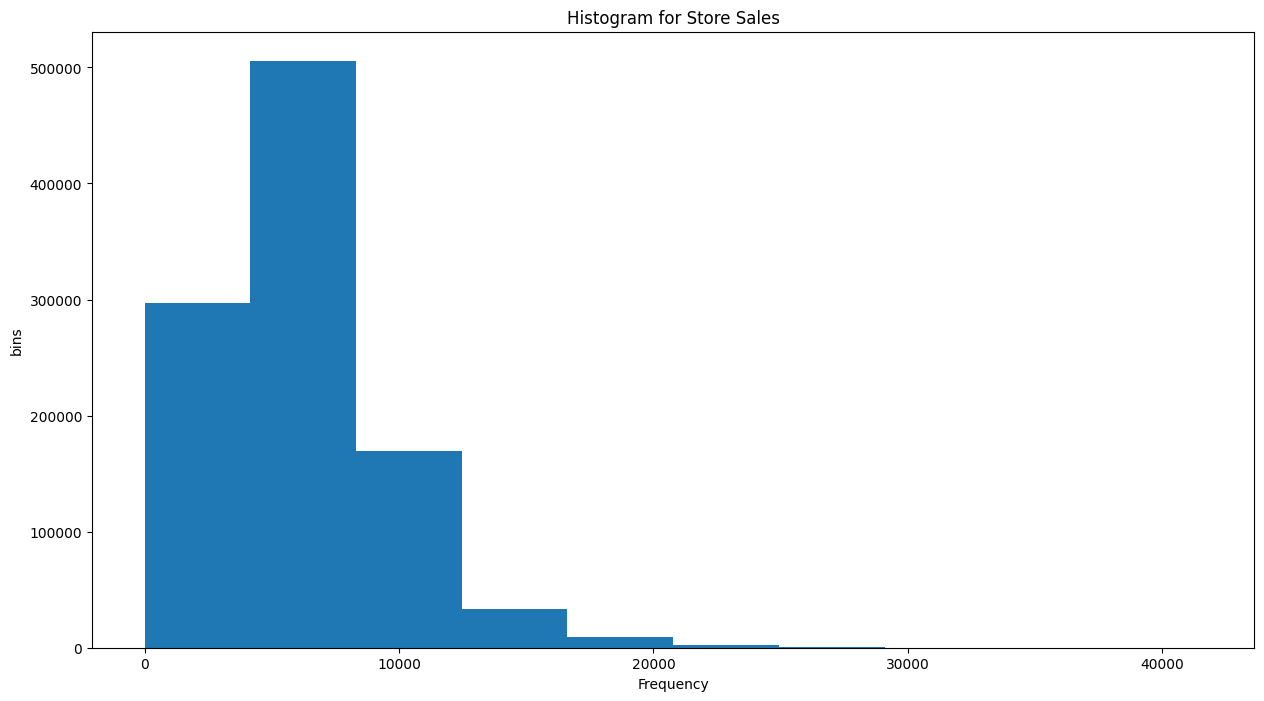

In [76]:
#create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(15,8))
plt.hist(df_new["Sales"])
plt.title("Histogram for Store Sales")
plt.xlabel('Frequency')
plt.ylabel('bins')
plt.show()

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>,
        <Axes: title={'center': 'SchoolHoliday'}>],
       [<Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>,
        <Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>],
       [<Axes: title={'center': 'Promo2SinceWeek'}>,
        <Axes: title={'center': 'Promo2SinceYear'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Quarter'}>],
       [<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Day'}>, <Axes: >, <Axes: >]],
      dtype=object)

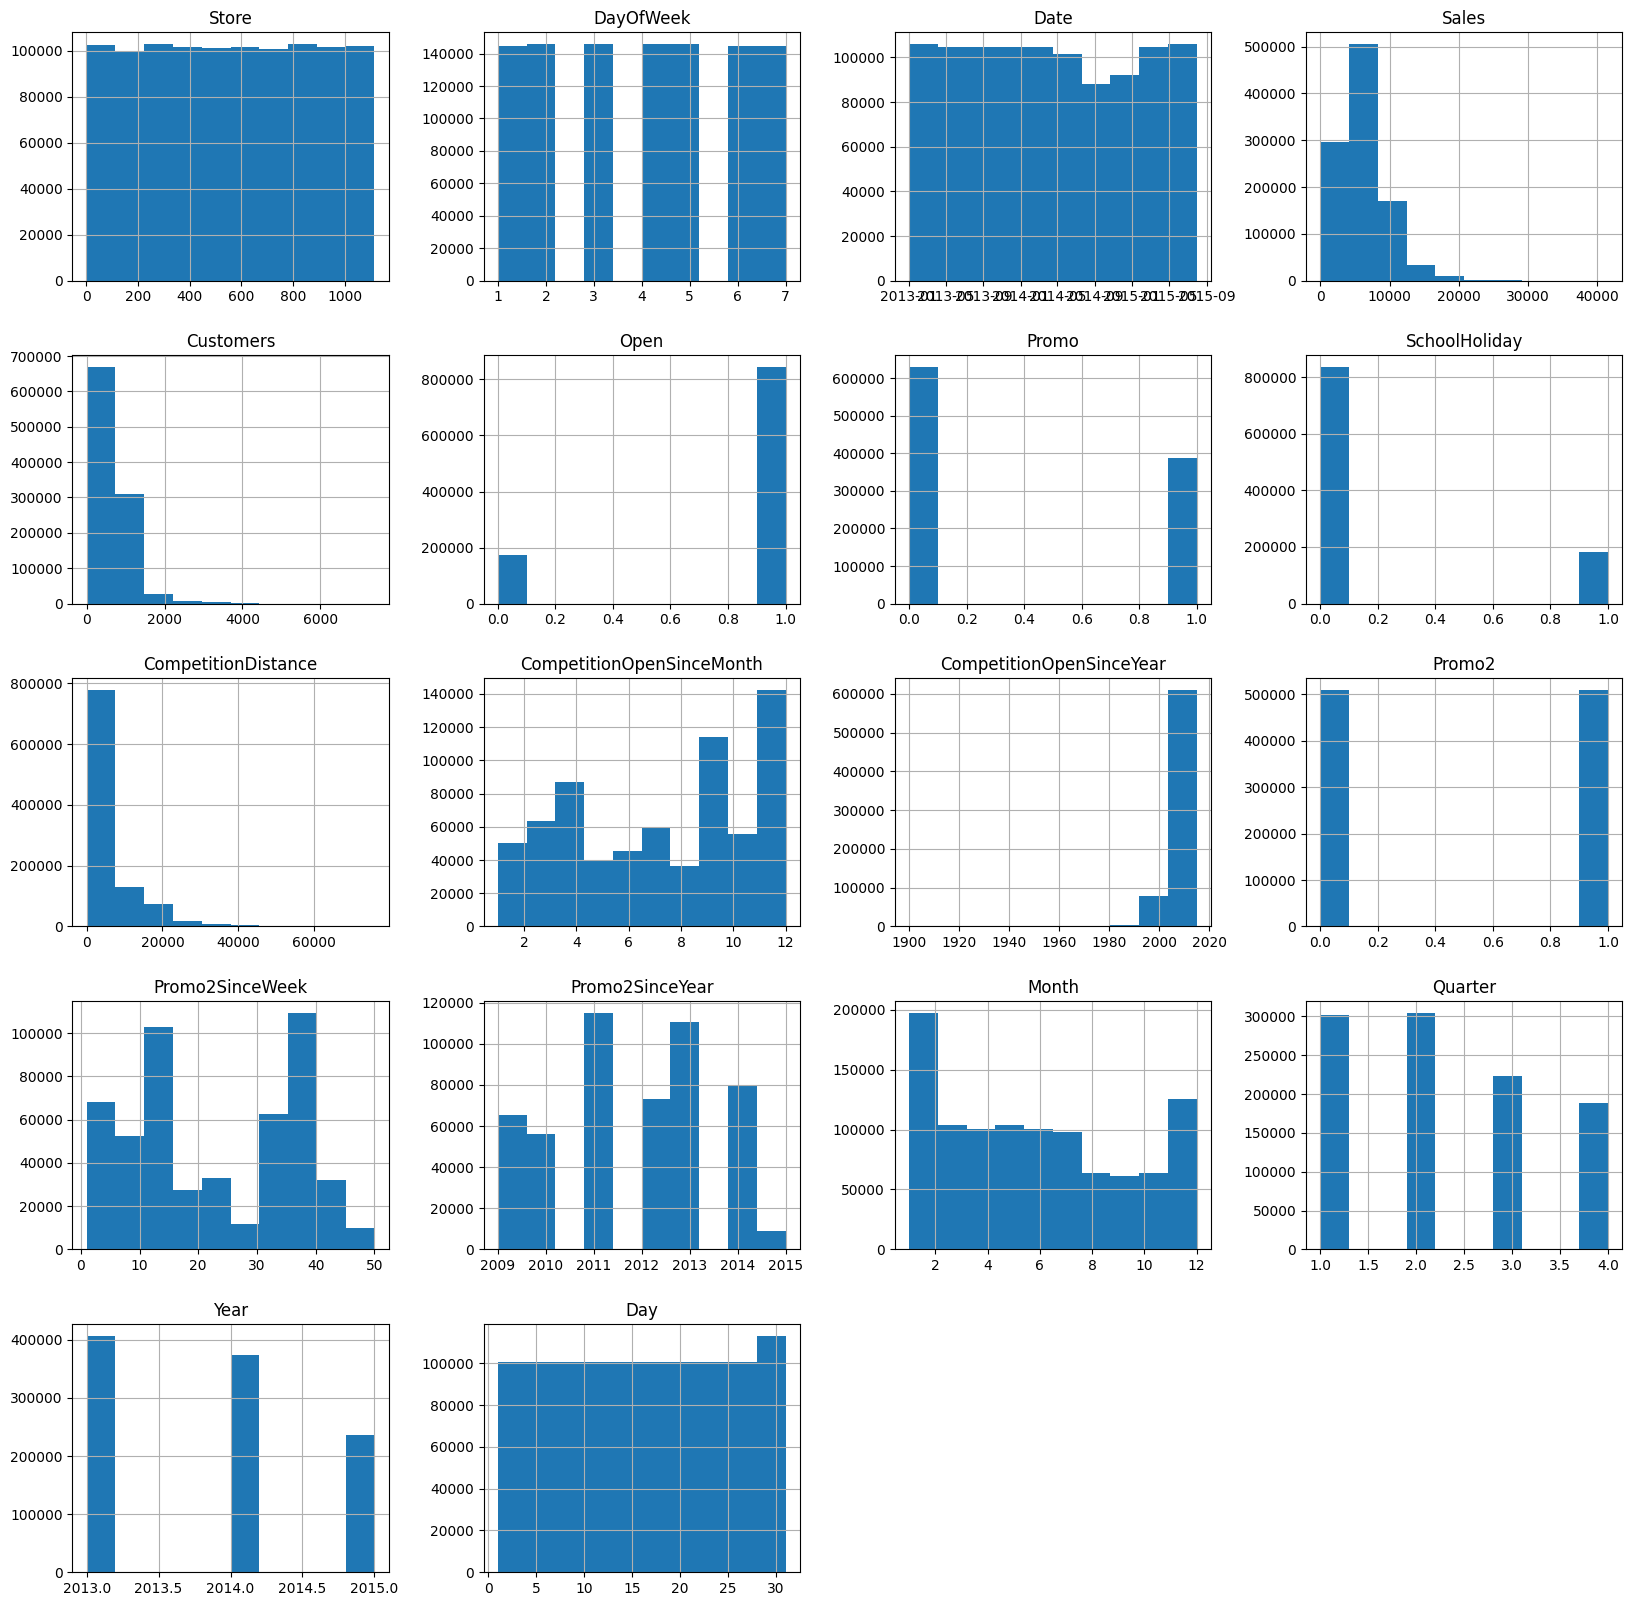

In [77]:
#use the histogram function provided by the pandas object 
#The function returns a cross-tab histogram plot for all numeric columns in the data
df_new.hist(figsize=(20,20))

In [78]:
#finding if there is any null value
df_new.isnull().sum()/df_new.shape[0]*100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [79]:
#replace nulls with the mode
df_new["CompetitionDistance"]=df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])

In [80]:
#double check if we still see nulls for the column
df_new["CompetitionDistance"].isnull().sum()

0

In [81]:
#Seaborn is another powerful visualization library for python
import seaborn as sns

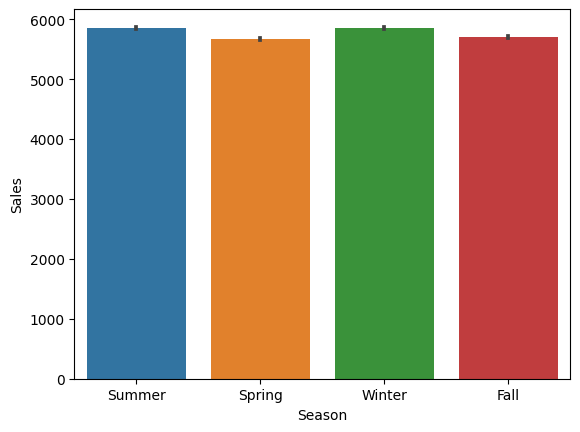

In [82]:
#Create the bar plot for Average sales across different seasons
ax = sns.barplot(x="Season", y="Sales", data=df_new)

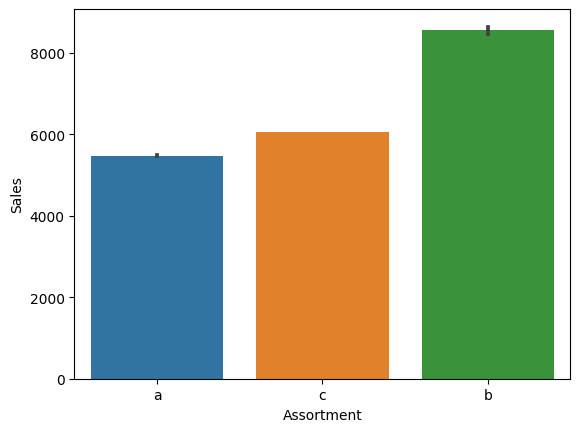

In [83]:
#Create the bar plot for Average Sales across different Assortments
ax = sns.barplot(x="Assortment",y ='Sales', data=df_new)

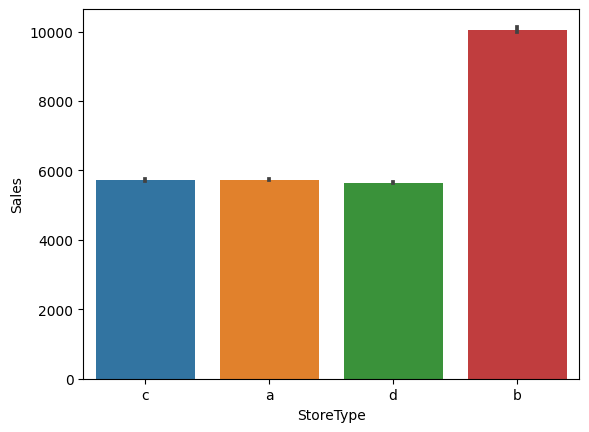

In [84]:
#create the barplot for average sales across different store types
ax = sns.barplot(x="StoreType",y='Sales',data=df_new)

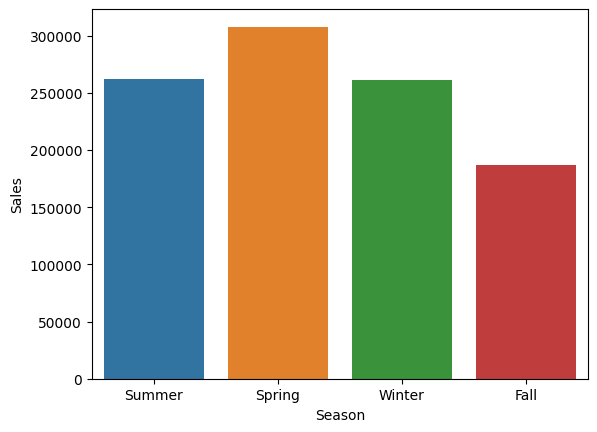

In [85]:
ax = sns.barplot(x="Season", y="Sales", data=df_new, estimator=np.size)

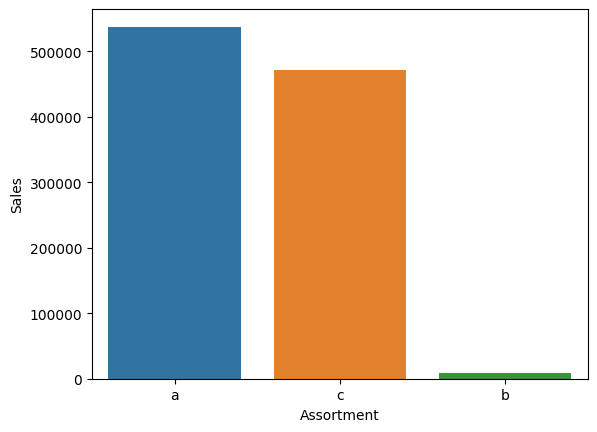

In [86]:
ax = sns.barplot(x="Assortment",y ='Sales', data=df_new, estimator=np.size)

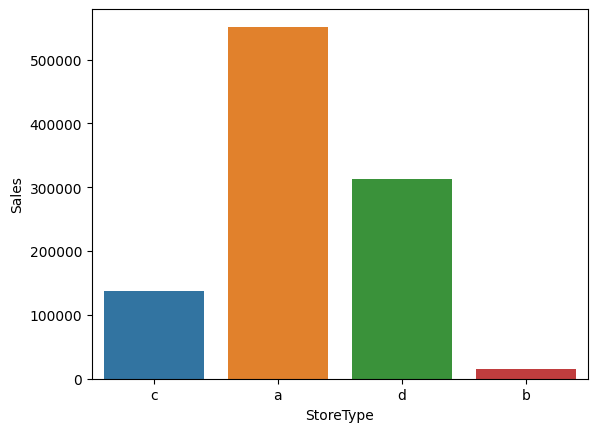

In [87]:
ax = sns.barplot(x="StoreType",y='Sales',data=df_new,estimator=np.size)

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
from sklearn.preprocessing import OneHotEncoder

In [100]:
target =["Sales"]
numeric_columns = ["Customers","Open","Promo","Promo2","StateHoliday","SchoolHoliday","CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year","StoreType","Assortment","Season"]

In [101]:
#define a function that takes the raw dataframe and the column name and return a one hot encoded DF
def create_ohe(df, col):
    le = LabelEncoder()
    a = le.fit_transform(df_new[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns=column_names))

In [102]:
#since the above function converts the column, one at a time 
#we create a loop to create the final dataset with all features
temp = df_new[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(df_new,column)
    temp = pd.concat([temp,temp_df],axis=1)

C:\Users\gaura\.conda\envs\virEnv\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\gaura\.conda\envs\virEnv\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\gaura\.conda\envs\virEnv\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\gaura\.conda\envs\virEnv\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in vers

In [103]:
print("Shape of Data:",temp.shape)
print("Distinct Datatypes:",temp.dtypes.unique())

Shape of Data: (1017209, 44)
Distinct Datatypes: [dtype('int64') dtype('O') dtype('float64')]


In [104]:
print(temp.columns[temp.dtypes=="object"])

Index(['StateHoliday'], dtype='object')


In [105]:
temp["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [106]:
temp["StateHoliday"]=np.where(temp["StateHoliday"]=='O',0,1)
#One last check check of the data type
temp.dtypes.unique()

array([dtype('int64'), dtype('int32'), dtype('float64')], dtype=object)

In [110]:
from sklearn.model_selection import train_test_split
#create train and test dataset with an 80:20 split
x_train, x_test, y_train, y_test = train_test_split(temp, df_new[target],test_size=0.2, random_state=2018)

In [111]:
#further divide the training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=2018)

In [113]:
#check the sizes of all newly created datasets
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of x_val: ",x_val.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)
print("Shape of y_val: ",y_val.shape)

Shape of x_train:  (732390, 44)
Shape of x_test:  (203442, 44)
Shape of x_val:  (81377, 44)
Shape of y_train:  (732390, 1)
Shape of y_test:  (203442, 1)
Shape of y_val:  (81377, 1)


In [114]:
#calculate the average score of the training dataset
mean_sales = y_train.mean()
print("Average sales: ",mean_sales)

Average sales:  Sales    5773.099997
dtype: float64
